In [4]:
%load_ext autoreload
%autoreload 2
import datetime
print(datetime.datetime.now())

from pygentoolbox import Tools
from pygentoolbox import ReadSubtractionByGenomeMapping as readsubtract
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2021-09-16 16:35:35.255564


In [5]:
import os
print(os.getcwd())

/media/sf_LinuxShare/PyPacks/PyGenToolbox/notebooks/Lyna


yep your reads must already be clean
Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/210705_SN6662_A_L001_ADPF-116_AdapterTrimmed_R1_15bp.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/210705_SN6662_A_L001_ADPF-116_AdapterTrimmed_R1_15bp.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/210705_SN6662_A_L001_ADPF-116_AdapterTrimmed_R1_15bp.fastq

Starting fastqc
/media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/fastqc
Directory  /media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/fastqc  already exists
/media/sf_LinuxShare/Programs/FastQC/fastqc -o /media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/fastqc -f fastq fastq /media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/210705_SN666

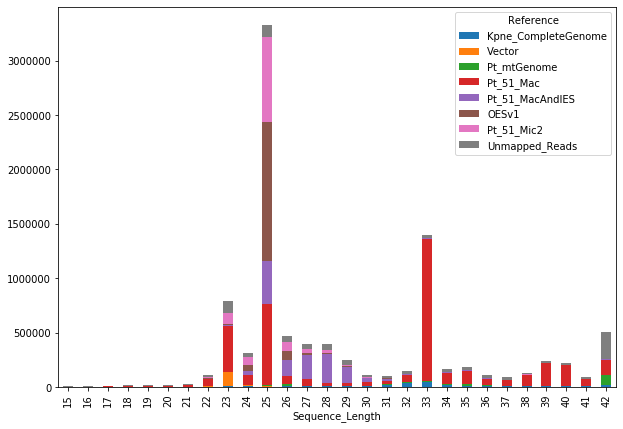

In [6]:

fileextension='.fastq.gz'
directory = '/media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts'
outplotname = 'EV_Late_Inserts_Stacked_Barplot.pdf'
startseqlength = 15
cleanreads=True
blastdatabase = '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabaselist=['/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Kpne_CompleteGenome',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Vector',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_mtGenome',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/OESv1',\
                   '/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mic2']

readsubtract.main(fileextension, directory, outplotname, startseqlength, cleanreads, blastdatabase, aligndatabaselist)

In [ ]:
import os
import glob
import subprocess
from pygentoolbox import SeqsPerFeatureAndFeatureTypeFixed

mappeddirectory='/media/sf_LinuxShare/Projects/Lyna/Hisat2/Pt_51_Mac/lnc1_KD_sRNAs/EV_late_inserts/33bpMac'
Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'
# mappeddirectory = os.path.join(directory, 'hisat2')
# collect sorted sam files generated in the previous step:
samfileextension = '.sort.sam'

# collect sorted sam files generated in the previous step:
#samfileextension = '.sort.sam'
samfilelist = []
for file in os.listdir(mappeddirectory):
    if file.endswith(samfileextension):
        samfilelist.append(os.path.join(mappeddirectory, file))
        
# count number of reads per feature
# count number of reads per feature type (exon, mRNA, 5' UTR, etc.) and sort so counts are decreasing

#bamfilelist = ['180917_NB501850_A_L1-4_ADPF-29_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.bam']
# convert bam to sam
#samfilelist = []
#for bam in bamfilelist:
#    bampath = os.path.join(directory, bam)
#    cmd = 'samtools view -h %s' % (bampath)
#    with open(bampath[:-len('.bam')] + '.sam', 'w') as OUT:
#        ps = subprocess.Popen(cmd.split(), stdout=OUT)
#        ps.wait()
#    samfilelist.append(bampath[:-len('.bam')] + '.sam')


SeqsPerFeatureAndFeatureTypeFixed.main(Gff3file, samfilelist)
print(datetime.datetime.now())